<a href="https://colab.research.google.com/github/AndrewSmith44/MAT421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. ODE Initial Value Problem Statement

An Initial Value Problem (IVP) involves solving an ordinary differential equation (ODE) given an initial condition. The general form of an IVP is:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

Where:

- dy/dx is the derivative of y with respect to x,
- f(x, y) is a function defining the rate of change of y,
- x₀ is the initial value of x,
- y₀ is the initial value of y at x = x₀.



We can solve this using various methods, such as the Euler method.

Example Implementation:

Consider the ODE:

$$
\frac{dy}{dx} = x + y, \quad y(0) = 1
$$

We will solve this using the Euler method, which approximates the solution at discrete points using the update rule:

$$
y_{n+1} = y_n + h \cdot f(x_n, y_n)
$$

Where:

- yₙ is the value of y at step n,
- h is the step size,
- f(xₙ, yₙ) is the function representing the ODE.


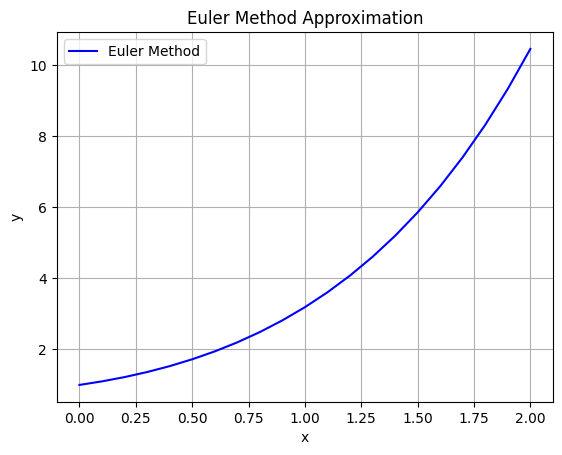

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + y

def euler_method(f, y0, x0, xn, h):
    steps = int((xn - x0) / h)
    x_values = np.linspace(x0, xn, steps + 1)
    y_values = np.zeros(steps + 1)
    y_values[0] = y0

    for n in range(steps):
        y_values[n + 1] = y_values[n] + h * f(x_values[n], y_values[n])

    return x_values, y_values

x0, xn, y0, h = 0, 2, 1, 0.1
x_values, y_values = euler_method(f, y0, x0, xn, h)

plt.plot(x_values, y_values, label="Euler Method", color='blue')
plt.title("Euler Method Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


2. Reduction of Order

The Reduction of Order method is used to solve second-order linear homogeneous differential equations when one solution is known. Given the equation:

$$
y'' + p(x)y' + q(x)y = 0
$$

And knowing one solution
𝑦
1
(
𝑥
), we can find the second solution
𝑦
2
(
𝑥
) using:

$$
y_2(x) = v(x) y_1(x)
$$

Where
𝑣
(
𝑥
)
is a function to be determined. By substituting
𝑦
2
(
𝑥
)
 into the differential equation and solving for
𝑣
(
𝑥
), we obtain the second solution.

Example Implementation:
For the equation:

$$
y'' - 3y' + 2y = 0
$$

Let
𝑦
1
(
𝑥
)
=
𝑒
2^𝑥
  be the first solution. We now apply the reduction of order method to find the second solution.

In [3]:
import sympy as sp

x = sp.symbols('x')
y1 = sp.exp(2*x)

y = sp.Function('y')(x)
ode = sp.Eq(y.diff(x, x) - 3*y.diff(x) + 2*y, 0)

v = sp.Function('v')(x)
y2 = v * y1

equation = ode.subs(y, y2).simplify()
v_solution = sp.dsolve(equation, v)
v_solution


Eq(v(x), C1 + C2*exp(-x))

3. The Euler Method

The Euler method is a numerical technique used to approximate the solution of an ODE. Given the equation:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$


The update rule for the Euler method is:

$$
y_{n+1} = y_n + h \cdot f(x_n, y_n)
$$

Where:

ℎ is the step size,

𝑦𝑛 is the approximation of
𝑦
 at step
𝑛.

Example Implementation:
Using the same ODE from the IVP example:

$$
\frac{dy}{dx} = x + y, \quad y(0) = 1
$$

We can approximate the solution using the Euler method.

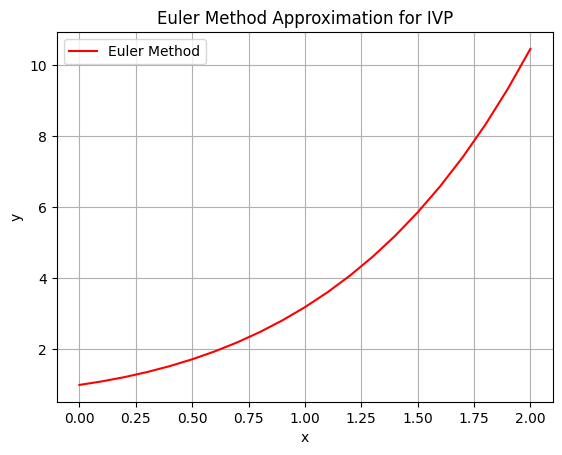

In [4]:
def euler_method_example(f, y0, x0, xn, h):
    steps = int((xn - x0) / h)
    x_values = np.linspace(x0, xn, steps + 1)
    y_values = np.zeros(steps + 1)
    y_values[0] = y0

    for n in range(steps):
        y_values[n + 1] = y_values[n] + h * f(x_values[n], y_values[n])

    return x_values, y_values

x0, xn, y0, h = 0, 2, 1, 0.1
x_values, y_values = euler_method_example(f, y0, x0, xn, h)

plt.plot(x_values, y_values, label="Euler Method", color='red')
plt.title("Euler Method Approximation for IVP")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
